['/data/lvm/sci/agcam/east/20221102/lvm.sci.agcam.east_00000566.fits', '/data/lvm/sci/agcam/west/20221102/lvm.sci.agcam.west_00000566.fits', '/data/lvm/spec/agcam/center/20221102/lvm.spec.agcam.center_00000545.fits']


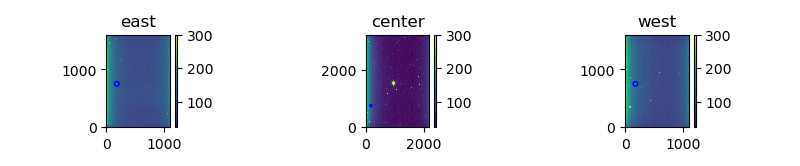

In [35]:
%matplotlib widget
#%matplotlib inline 

import asyncio

from cluplus.proxy import invoke

from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

from IPython.display import clear_output

await lvm.sci.agc.start()
await lvm.spec.agc.start()
await lvm.spec.agc.reconnect()

exptime = 5
#while True:
rc = await invoke(lvm.sci.agc.expose(exptime),lvm.spec.agc.expose(exptime+0.01))
clear_output(wait=True)
filenames = rc.flatten().unpack("*.filename") 
print(filenames)

#cat_extra=[{'x': 180, 'y': 750, 'a': 10, 'b': 10, 'theta': 0}]

#plot_images([Image.from_file(filenames[0])], cat_extra=cat_extra, vmax=3000)
#plot_images([Image.from_file(filenames[0]), Image.from_file(filenames[1])])
plot_images([Image.from_file(filenames[0]), Image.from_file(filenames[2]), Image.from_file(filenames[1])], vmax=300, rotate=[1,1,1], cat_extra=cat_extra)



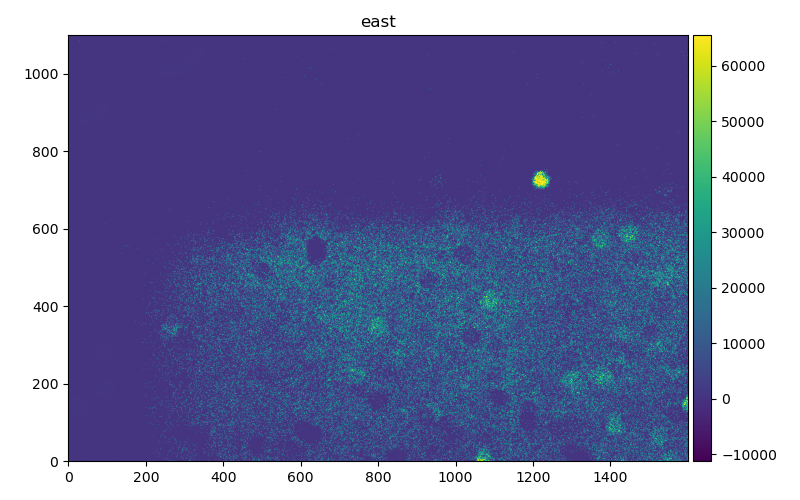

In [22]:
img0 = Image.from_file(filenames[0])
img1 = Image.from_file(filenames[1])
#img0.header


imgsum = img0.copy()
imgsum.data -= img1.data

plot_images([imgsum])



In [61]:
print(await lvm.sci.agc.reconnect())
print(await lvm.spec.agc.reconnect())

{'east': {'state': 'online'}, 'west': {'state': 'online'}}
{'center': {'state': 'online'}}


In [32]:
%matplotlib inline

from cluplus.proxy import invoke
from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

await lvm.spec.agc.start()
await lvm.skye.agc.start()
await lvm.spec.agc.reconnect()
await lvm.skye.agc.reconnect()

exptime = 5
rc = await invoke(lvm.skye.agc.expose(exptime), lvm.spec.agc.expose(exptime))
filenames = rc.flatten().unpack("*.filename")

print(filenames)
plot_images([Image.from_file(f) for f in filenames])

[WARNING]: actor lvm.skye.agcam currently not reachable.


Exception: Failed routing message to consumer 'lvm.skye.agcam'.

In [ ]:
import asyncio

await lvm.spec.agc.reconnect()

exptime=1.0
while True:
  await lvm.spec.agc.expose(exptime)
  await asyncio.sleep(0.5)

In [ ]:
ra_off_d = 60
dec_off_d = 0

await lvm.sci.pwi.offset(ra_add_arcsec = ra_off_d, dec_add_arcsec = dec_off_d)


In [ ]:
import asyncio

await lvm.sci.agc.start()
await lvm.sci.agc.reconnect()

exptime=5.000
for i in range(100):
#while True:
  filenames = (await lvm.sci.agc.expose(exptime)).flatten().unpack("*.filename")
  print(filenames)
  await asyncio.sleep(0.5)

In [ ]:
await lvm.sci.ag.start()
await lvm.sci.ag.guideStop()

In [ ]:
await lvm.sci.km.start()
await lvm.sci.km.slewStop()

In [ ]:
await lvm.sci.pwi.start()
ra, dec = (await lvm.sci.pwi.status()).flatten().unpack("ra_j2000_hours", "dec_j2000_degs")

await lvm.sci.km.slewStart(ra, dec)